In [3]:
import numpy as np
noise = 0.4
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)



### By default, GPRegression also estimates the noise parameter σy from data, so we have to fix() this parameter to be able to reproduce the above results.

In [4]:
import sys
sys.path.insert(1,'/Users/junesong/programming/GP/GPy')
import GPy

rbf = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gpr = GPy.models.GPRegression(X_train, Y_train, rbf)



### with fitted/optimzed hyperparameter

 /Applications/anaconda/envs/py36_1/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


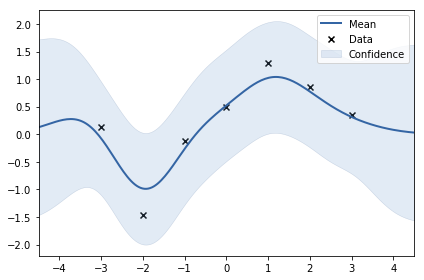

In [5]:
# Fix the noise variance to known value 
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()

# Run optimization
gpr.optimize();

# Obtain optimized kernel parameters
l = gpr.rbf.lengthscale.values[0]
sigma_f = np.sqrt(gpr.rbf.variance.values[0])

###### Compare with previous results
##assert(np.isclose(l_opt, l))
##assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results with the built-in plot function
gpr.plot();
